In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_df = pd.read_csv('customer_churn_dataset-training-master.csv').drop('CustomerID',axis =1)
testing_df = pd.read_csv('customer_churn_dataset-testing-master.csv').drop('CustomerID',axis = 1)

In [60]:
final_df = pd.concat([training_df,testing_df])
final_df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


<Axes: xlabel='Age', ylabel='Count'>

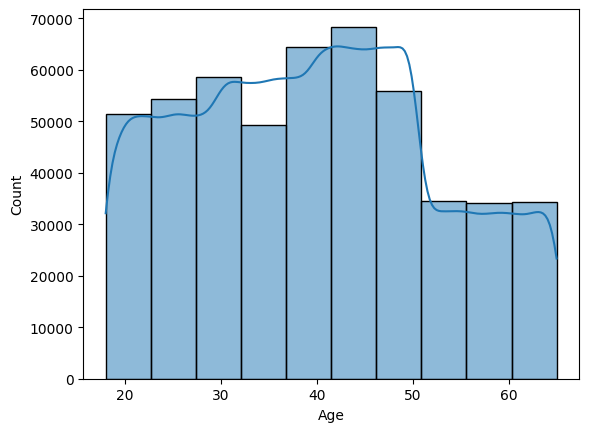

In [4]:
sns.histplot(final_df['Age'],kde=True,bins=10)

<Axes: xlabel='count', ylabel='Gender'>

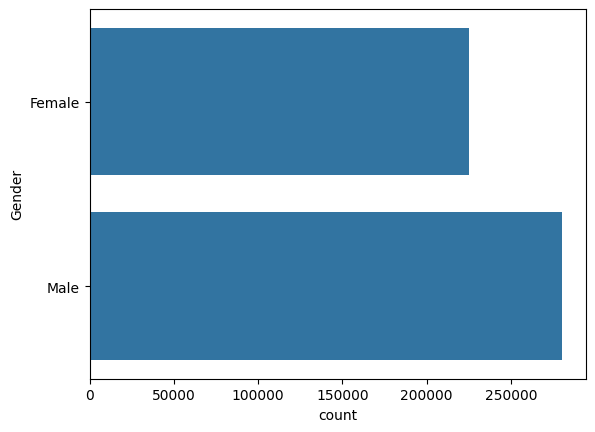

In [5]:
sns.countplot(final_df['Gender'])

<Axes: xlabel='Tenure', ylabel='Count'>

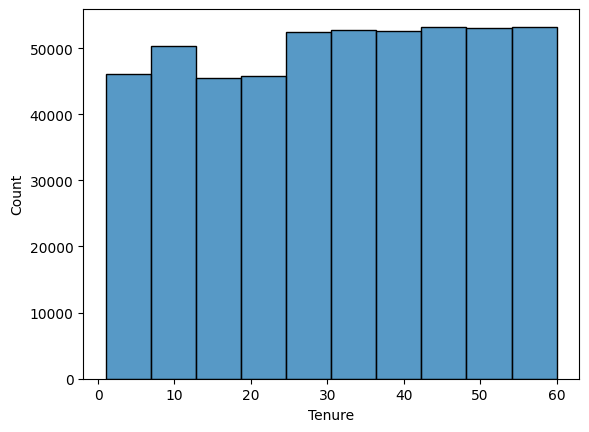

In [6]:
sns.histplot(final_df['Tenure'],bins=10)

<Axes: xlabel='count', ylabel='Subscription Type'>

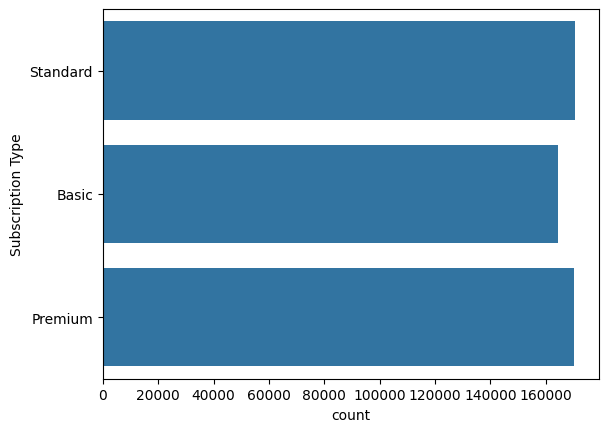

In [7]:
sns.countplot(final_df['Subscription Type'])

<Axes: xlabel='Subscription Type', ylabel='Churn'>

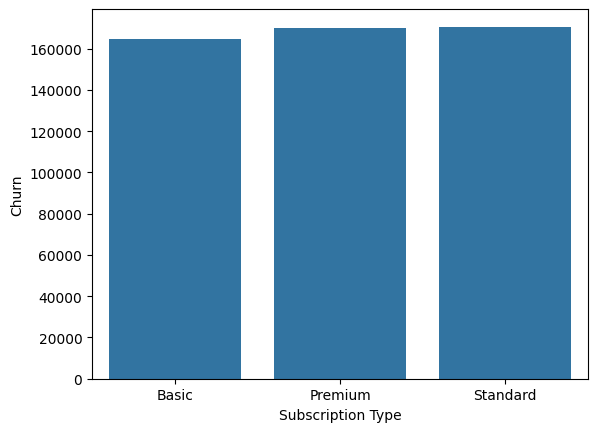

In [8]:
sns.barplot(final_df.groupby(['Subscription Type'])['Churn'].count())


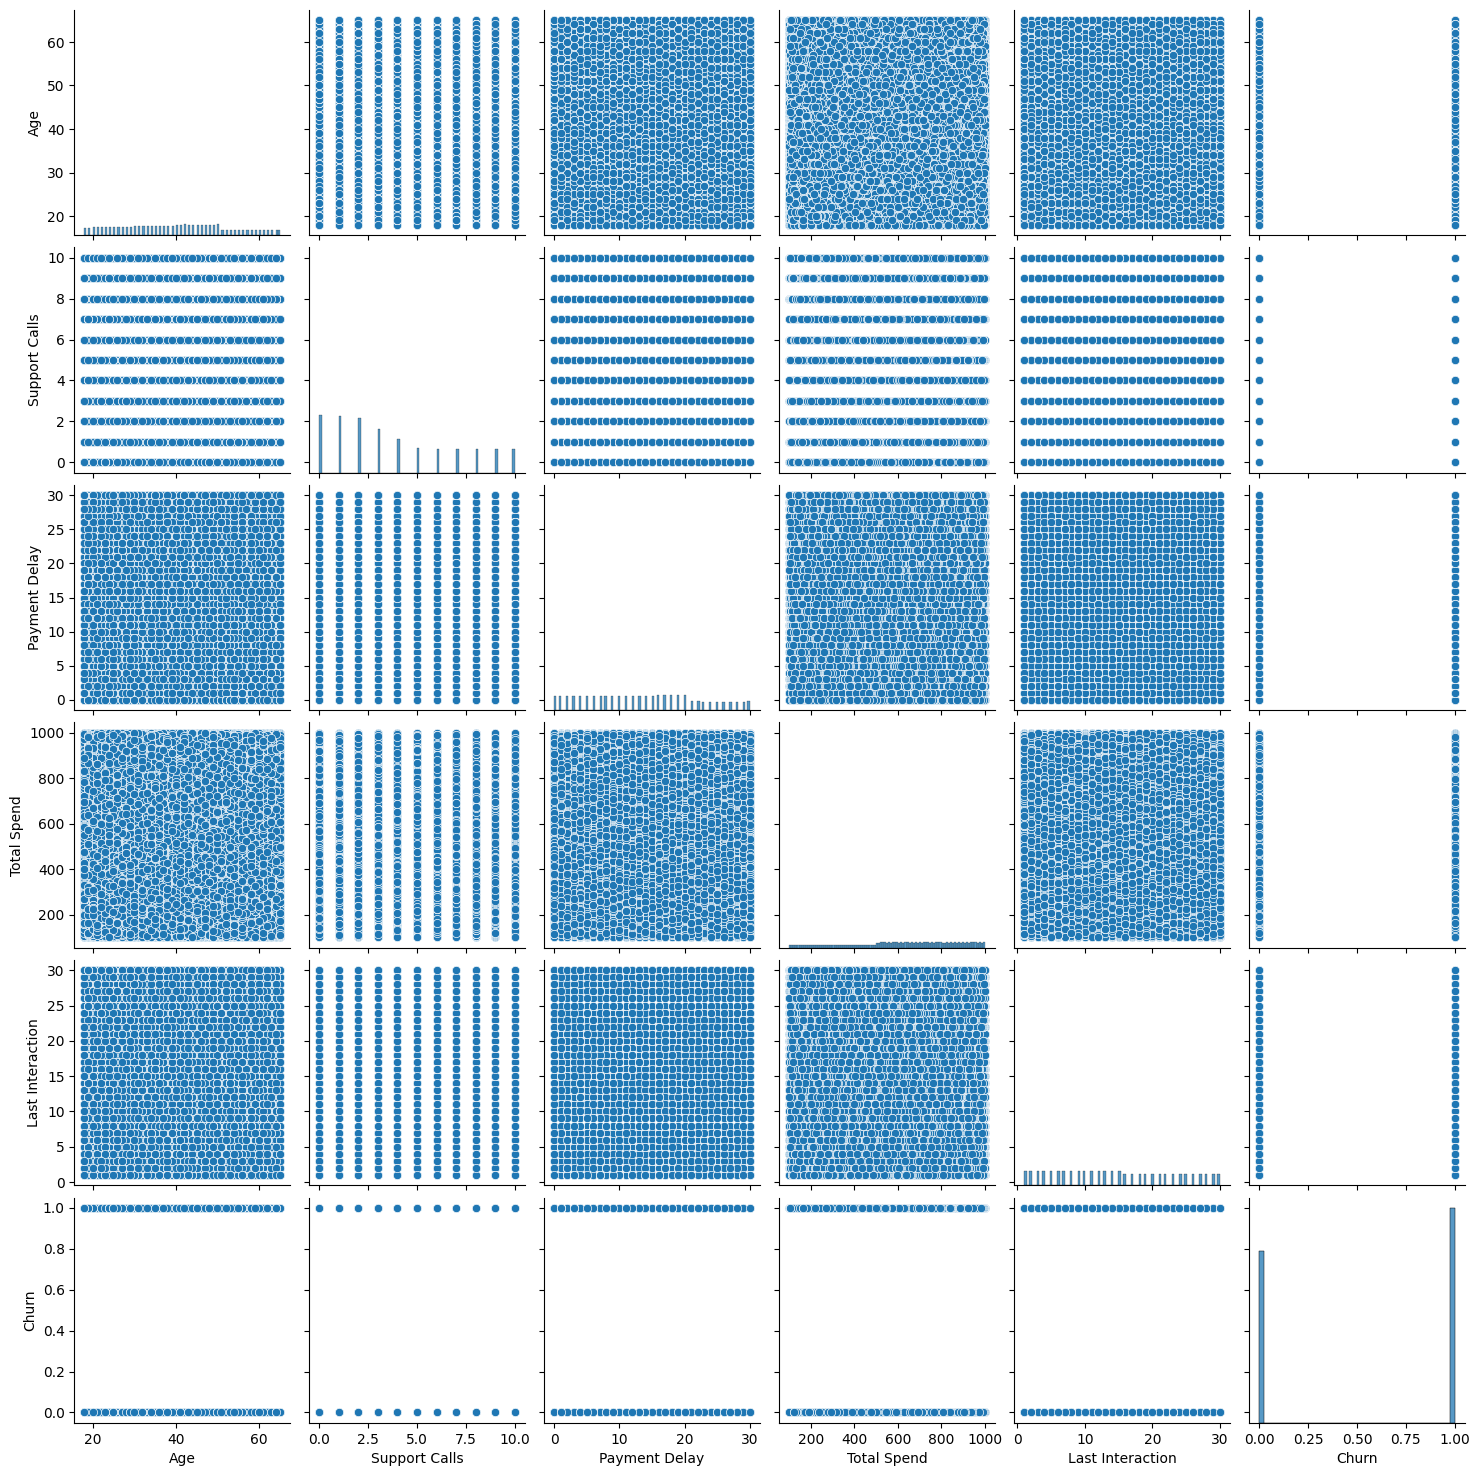

In [52]:
sns.pairplot(final_df)

In [9]:
final_df.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [10]:
final_df.dropna(inplace=True)
final_df.drop(columns=['Contract Length','Gender'],axis = 1,inplace=True)
final_df.isnull().sum()

Age                  0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [11]:
final_df['Subscription Type'] = final_df['Subscription Type'].map({'Basic':0,'Standard':1,'Premium':2})

<Axes: >

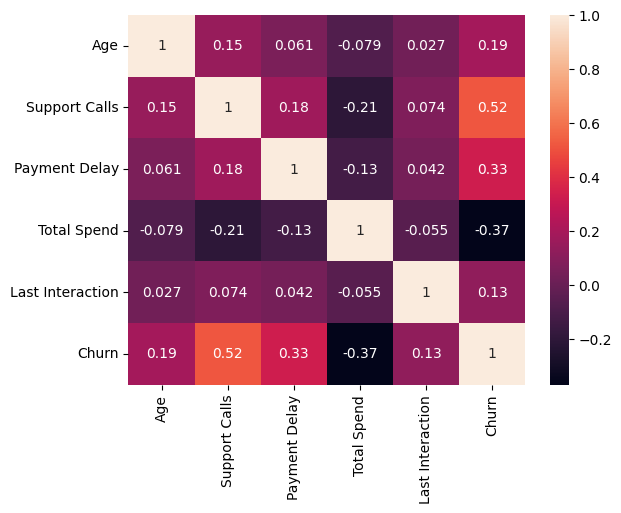

In [53]:
corr = final_df.corr()

sns.heatmap(corr,annot = True)

In [13]:
final_df.drop(columns=['Tenure','Usage Frequency','Subscription Type'],axis=1,inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
X = final_df.drop('Churn',axis=1)
y = final_df['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier()

rf.fit(X_train_scaled,y_train)


RandomForestClassifier()

In [15]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,rf.predict(X_test_scaled))


0.9112840651771151

In [16]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(X_train_scaled,y_train)

AdaBoostClassifier()

In [18]:
adb_pred = adb.predict(X_test_scaled)
accuracy_score(y_test,adb_pred)

0.864665642665991

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier


clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(n_estimators=150)
clf3 = KNeighborsClassifier(n_neighbors=7)

meta_clf = LogisticRegression()

sclf = StackingClassifier(estimators=[('clf1',clf1),('clf2',clf2),('clf3',clf3)],final_estimator= meta_clf)

In [33]:
sclf.fit(X_train_scaled,y_train)

StackingClassifier(estimators=[('clf1', DecisionTreeClassifier()),
                               ('clf2',
                                RandomForestClassifier(n_estimators=150)),
                               ('clf3', KNeighborsClassifier(n_neighbors=7))],
                   final_estimator=LogisticRegression())

In [34]:
stacking_pred = sclf.predict(X_test_scaled)

In [37]:
accuracy_score(y_test,stacking_pred)*100

91.17195293819576

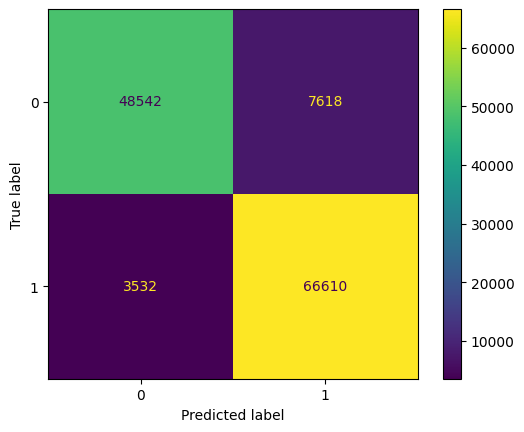

In [50]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(y_test,stacking_pred)
ConfusionMatrixDisplay(cf).plot()

In [41]:
import pickle

pickle.dump(sclf,open('sclf.pkl','wb'))

In [42]:
final_df.head()

,Age,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,30.0,5.0,18.0,932.0,17.0,1.0
1,65.0,10.0,8.0,557.0,6.0,1.0
2,55.0,6.0,18.0,185.0,3.0,1.0
3,58.0,7.0,7.0,396.0,29.0,1.0
4,23.0,5.0,8.0,617.0,20.0,1.0


In [45]:
sclf.predict([[30.0,5.0,18.0,932.0,17.0]])

array([1.])